
## <center>Hierarchical Clustering
#####<center> **Name** - Masood Ahmed
<br/>
<br/>

**Task** - Implement Hierarchical Clustering on the Iris Dataset.

*   Cluster the 150 points to 3 clusters
*   Compare Cluster labels with true class labels
</span>

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataframe_iris =pd.read_csv(URL, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class_labels"])
dataframe_iris

,sepal_length,sepal_width,petal_length,petal_width,class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# **Initial Data Exploration**

In [3]:
dataframe_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataframe_iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,class_labels
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
dataframe_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class_labels  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
dataframe_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
dataframe_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class_labels    0
dtype: int64

In [8]:
classes = set(dataframe_iris["class_labels"])
print("possible classes in dataframe are: ", classes)

possible classes in dataframe are:  {'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'}


In [9]:
dataframe_iris.corr()

<ipython-input-9-5bf42fe7829e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe_iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [10]:
# separating labels and features
# first replacing the class_labels from object type to int type as 'Iris-setosa' : 0, 'Iris-versicolor' : 1 , 'Iris-virginica' : 2
dataframe_iris['class_labels'] = dataframe_iris['class_labels'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0, 1, 2])
target_labels = dataframe_iris['class_labels']
features_data = dataframe_iris.drop(columns=['class_labels'])

In [11]:
# getting the target labels
target_labels.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# getting the features
features_data.values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
# for our reference to see how is the data distributed
target_labels.value_counts()

0    50
1    50
2    50
Name: class_labels, dtype: int64

# **Helper Functions**

In [14]:
def compare(tg, linkage_type):
  unique, counts = np.unique(tg, return_counts=True)

  print('Number of data points in each cluster:')
  print('\nTrue Class Label')
  #  from our previous observation, we have seen Iris-setosa, Iris-versicolor, Iris-virginica are evenly distributed so each are 50, 50, 50
  print("Iris-setosa: 50")
  print("Iris-versicolor: 50")
  print("Iris-virginica: 50")


  print(f'\nIn our {linkage_type} Linkage Hierarchical Clustering there are: \n')
  pred = dict(zip(unique, counts))
  for each in pred:
    if each == 0:
      print(f"Iris-setosa: {pred[each]}")
    if each == 1:
      print(f"Iris-versicolor: {pred[each]}")
    if each == 2:
      print(f"Iris-virginica: {pred[each]}")

In [15]:
def comparision_graph(predicted_target_values, x, y):

  if x == "Sepal Width":
    feature_one = x
    num_1 = 1
  elif x == "Petal Length":
    feature_one = x
    num_1 = 2
  elif x == "Petal Width":
    feature_one = x
    num_1 = 3
  elif x == "Sepal Length":
    feature_one = x
    num_1 = 0

  if y == "Sepal Width":
    feature_two = y
    num_2 = 1
  elif y == "Petal Length":
    feature_two = y
    num_2 = 2
  elif y == "Petal Width":
    feature_two = y
    num_2 = 3
  elif y == "Sepal Length":
    feature_two = y
    num_2 = 0


  # Creating the first scatter plot
  fig = plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
  plt.scatter(features_data.values[:, num_1], features_data.values[:, num_2], c=predicted_target_values, cmap="brg")
  plt.title(f"Scatter Plot of {feature_one} against {feature_two} \n with Predicted Class Labels")

  # Creating the second scatter plot
  plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
  plt.scatter(features_data.values[:, num_1], features_data.values[:, num_2], c=target_labels, cmap="brg")
  plt.title(f"Scatter Plot of {feature_one} against {feature_two} \n with True Class Labels")

  # Displaying the plots
  plt.tight_layout(pad=3.0)
  plt.show()

# **Implementation of Hierarchical Clustering**

Hierarchical clustering is a method in data analysis and machine learning that aims to group similar data points together based on their similarity or distance. It creates a hierarchy of clusters by iteratively merging or splitting clusters until a stopping criterion is met.

Complete linkage, single linkage, and average linkage are different linkage methods used in hierarchical clustering to determine the distance between clusters. Here's a brief explanation of each:

1 - Complete Linkage: In complete linkage, the distance between two clusters is defined as the maximum distance between any two points in the two clusters. This method tends to create compact, spherical clusters.

2 - Single Linkage: In single linkage, the distance between two clusters is defined as the minimum distance between any two points in the two clusters. This method tends to create elongated, chain-like clusters.

3 - Average Linkage: In average linkage, the distance between two clusters is defined as the average distance between all pairs of points in the two clusters. This method strikes a balance between complete and single linkage, often producing clusters that are neither too compact nor too elongated.


In [16]:
def single_linkage(data, cutoff, df, distance_matrix):
    d = {}
    for i in range(0, cutoff):
      # Find the minimum distance pair in the distance matrix
      ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
      # Assign cluster labels to the points in the pair
      if i == 0:
          df.iloc[ij_min[0]] = 0
          df.iloc[ij_min[1]] = 0
      else:
          try:
              a = int(df.iloc[ij_min[0]])
          except:
              df.iloc[ij_min[0]] = i
              a = i
          try:
              b = int(df.iloc[ij_min[1]])
          except:
              df.iloc[ij_min[1]] = i
              b = i
          df[(df[0]==a) | (df[0]==b)] = i
      d[i] = ij_min
      # Update the distance matrix based on single linkage
      for j in range(0, ij_min[0]):
          if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
              distance_matrix[ij_min[1]][j] = min(distance_matrix[ij_min[0]][j], distance_matrix[ij_min[1]][j])
      distance_matrix[ij_min[0]] = np.inf
    return d, df[0].to_numpy()

In [17]:
def average_linkage(data, cutoff, df, distance_matrix):
    d_average = {}
    for i in range(0, cutoff):
        ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
        if i == 0:
            df.iloc[ij_min[0]] = 0
            df.iloc[ij_min[1]] = 0
        else:
            try:
                a = int(df.iloc[ij_min[0]])
            except:
                df.iloc[ij_min[0]] = i
                a = i
            try:
                b = int(df.iloc[ij_min[1]])
            except:
                df.iloc[ij_min[1]] = i
                b = i
            df[(df[0]==a) | (df[0]==b)] = i
        d_average[i] = ij_min
        for j in range(0, ij_min[0]):
            if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                distance_matrix[ij_min[1]][j] = (distance_matrix[ij_min[0]][j] + distance_matrix[ij_min[1]][j])/2.0
        distance_matrix[ij_min[0]] = np.inf
    return d_average, df[0].to_numpy()

In [18]:
def complete_linkage(data, cutoff, df, distance_matrix,):
    d_complete = {}
    for i in range(0, cutoff):
        ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
        if i == 0:
            df.iloc[ij_min[0]] = 0
            df.iloc[ij_min[1]] = 0
        else:
            try:
                a = int(df.iloc[ij_min[0]])
            except:
                df.iloc[ij_min[0]] = i
                a = i
            try:
                b = int(df.iloc[ij_min[1]])
            except:
                df.iloc[ij_min[1]] = i
                b = i
            df[(df[0]==a) | (df[0]==b)] = i
        d_complete[i] = ij_min
        for j in range(0, ij_min[0]):
            if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                distance_matrix[ij_min[1]][j] = max(distance_matrix[ij_min[0]][j], distance_matrix[ij_min[1]][j])
        distance_matrix[ij_min[0]] = np.inf
    return d_complete, df[0].to_numpy()

In [19]:
def Heirarchical(data, cutoff, linkage):
    # This function performs hierarchical clustering on the given data.
    # data: Input data as a 2D array
    # cutoff: The desired number of clusters
    # linkage: The type of linkage toperform (1 for single linkage, 2 for complete linkage, 3 for average linkage)

    distance_matrix = euclidean_distances(data, data) # Calculating distance matrix
    distance_matrix = np.tril(distance_matrix)
    distance_matrix[distance_matrix == 0] = np.inf # Replacing 0 by inf, it makes it easy for us to extract minimum using min function
    df = pd.DataFrame(data=np.ones(data.shape[0])*np.inf)

    #If user provides impractical cut-off, cluster everthing into one cluster and not listen to user
    if cutoff > distance_matrix.shape[0]:
        cutoff = distance_matrix.shape[0]
    if linkage == 1:
        return single_linkage(data, cutoff, df, distance_matrix)
    elif linkage == 2:
        return complete_linkage(data, cutoff, df, distance_matrix)
    elif linkage == 3:
        return average_linkage(data, cutoff, df, distance_matrix)

**Single Linkage.** Minimum distance is recorded from all pairwise measure.

In [20]:
d, target = Heirarchical(features_data.values, 147, 1)

In [21]:
d

{0: (39, 7),
 1: (132, 128),
 2: (17, 0),
 3: (48, 10),
 4: (91, 63),
 5: (92, 82),
 6: (96, 95),
 7: (4, 0),
 8: (7, 0),
 9: (28, 0),
 10: (40, 17),
 11: (47, 3),
 12: (81, 80),
 13: (137, 116),
 14: (3, 2),
 15: (12, 1),
 16: (21, 19),
 17: (38, 8),
 18: (46, 19),
 19: (49, 7),
 20: (27, 0),
 21: (30, 29),
 22: (45, 1),
 23: (75, 65),
 24: (93, 57),
 25: (99, 96),
 26: (138, 127),
 27: (9, 1),
 28: (29, 9),
 29: (34, 1),
 30: (37, 1),
 31: (95, 88),
 32: (80, 69),
 33: (126, 123),
 34: (139, 112),
 35: (26, 23),
 36: (42, 38),
 37: (89, 53),
 38: (25, 9),
 39: (97, 74),
 40: (84, 66),
 41: (143, 120),
 42: (73, 63),
 43: (127, 70),
 44: (11, 7),
 45: (43, 26),
 46: (147, 110),
 47: (23, 7),
 48: (82, 67),
 49: (116, 103),
 50: (19, 17),
 51: (58, 54),
 52: (65, 58),
 53: (78, 63),
 54: (145, 141),
 55: (146, 123),
 56: (148, 136),
 57: (144, 140),
 58: (94, 90),
 59: (87, 68),
 60: (122, 105),
 61: (140, 120),
 62: (6, 2),
 63: (52, 50),
 64: (56, 51),
 65: (113, 101),
 66: (130, 107

In [22]:
#Let's convert it to iris.target format
target[target == 140] = 0
target[target == 144] = 1
target[target == 146] = 2

In [23]:
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2.,
       2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

**Comparing Single Linking Hierarchical Clustering with True Class Labels**

In [24]:
compare(target, "Single")

Number of data points in each cluster:

True Class Label
Iris-setosa: 50
Iris-versicolor: 50
Iris-virginica: 50

In our Single Linkage Hierarchical Clustering there are: 

Iris-setosa: 50
Iris-versicolor: 20
Iris-virginica: 80


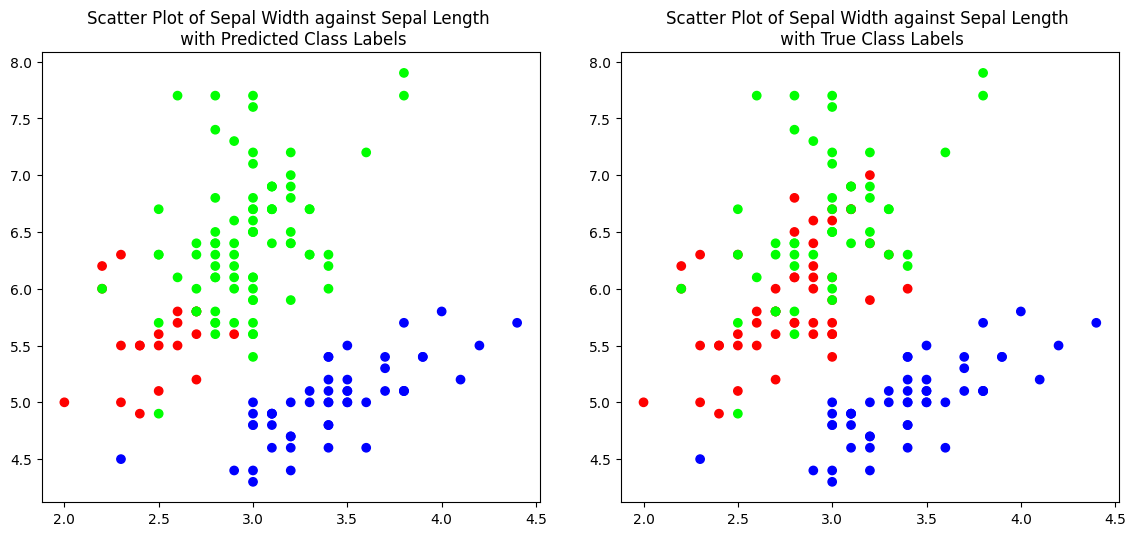

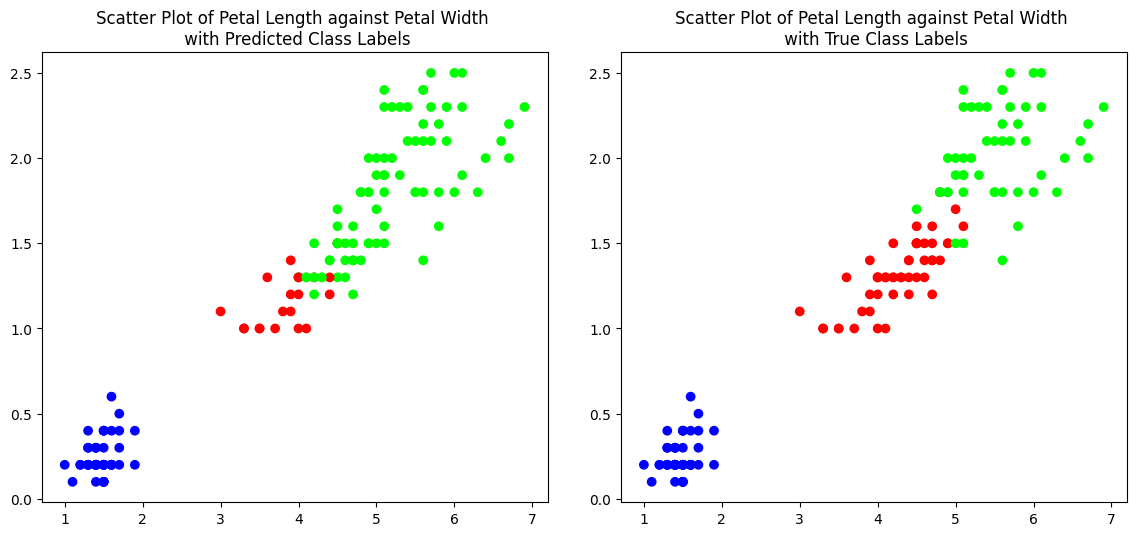

In [25]:
comparision_graph(target, "Sepal Width", "Sepal Length")
comparision_graph(target, "Petal Length", "Petal Width")

**Average Linkage:** Records the average of all pairwise distances.

In [26]:
d_average, target_average = Heirarchical(features_data.values, 147, 3)

In [27]:
d_average

{0: (39, 7),
 1: (132, 128),
 2: (17, 0),
 3: (48, 10),
 4: (91, 63),
 5: (92, 82),
 6: (96, 95),
 7: (4, 0),
 8: (28, 0),
 9: (40, 17),
 10: (47, 3),
 11: (81, 80),
 12: (137, 116),
 13: (12, 1),
 14: (21, 19),
 15: (38, 8),
 16: (46, 19),
 17: (49, 7),
 18: (27, 0),
 19: (30, 29),
 20: (45, 1),
 21: (75, 65),
 22: (93, 57),
 23: (99, 96),
 24: (138, 127),
 25: (9, 1),
 26: (34, 1),
 27: (37, 1),
 28: (126, 123),
 29: (139, 112),
 30: (95, 88),
 31: (7, 0),
 32: (3, 2),
 33: (29, 3),
 34: (26, 23),
 35: (42, 38),
 36: (89, 53),
 37: (25, 9),
 38: (97, 74),
 39: (84, 66),
 40: (80, 69),
 41: (143, 120),
 42: (73, 63),
 43: (11, 7),
 44: (43, 26),
 45: (147, 110),
 46: (116, 103),
 47: (58, 54),
 48: (78, 63),
 49: (145, 141),
 50: (146, 123),
 51: (148, 136),
 52: (144, 140),
 53: (127, 70),
 54: (82, 67),
 55: (94, 90),
 56: (87, 68),
 57: (122, 105),
 58: (6, 2),
 59: (52, 50),
 60: (56, 51),
 61: (113, 101),
 62: (130, 107),
 63: (142, 113),
 64: (65, 58),
 65: (140, 120),
 66: (19,

In [28]:
target_average

array([135., 135., 135., 135., 135., 135., 135., 135., 135., 135., 135.,
       135., 135., 135., 135., 135., 135., 135., 135., 135., 135., 135.,
       135., 135., 135., 135., 135., 135., 135., 135., 135., 135., 135.,
       135., 135., 135., 135., 135., 135., 135., 135., 135., 135., 135.,
       135., 135., 135., 135., 135., 135., 146., 146., 146., 143., 146.,
       146., 146., 143., 146., 143., 143., 146., 143., 146., 143., 146.,
       146., 143., 146., 143., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 143., 143., 143., 143., 146., 146., 146., 146., 146.,
       146., 143., 146., 146., 143., 143., 146., 146., 146., 146., 143.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146.])

In [29]:
target_average[target_average == 135] = 0
target_average[target_average == 143] = 1
target_average[target_average == 146] = 2

In [30]:
target_average

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

**Comparing Average Linking Hierarchical Clustering with True Class Labels**

In [31]:
compare(target_average, "Average")

Number of data points in each cluster:

True Class Label
Iris-setosa: 50
Iris-versicolor: 50
Iris-virginica: 50

In our Average Linkage Hierarchical Clustering there are: 

Iris-setosa: 50
Iris-versicolor: 16
Iris-virginica: 84


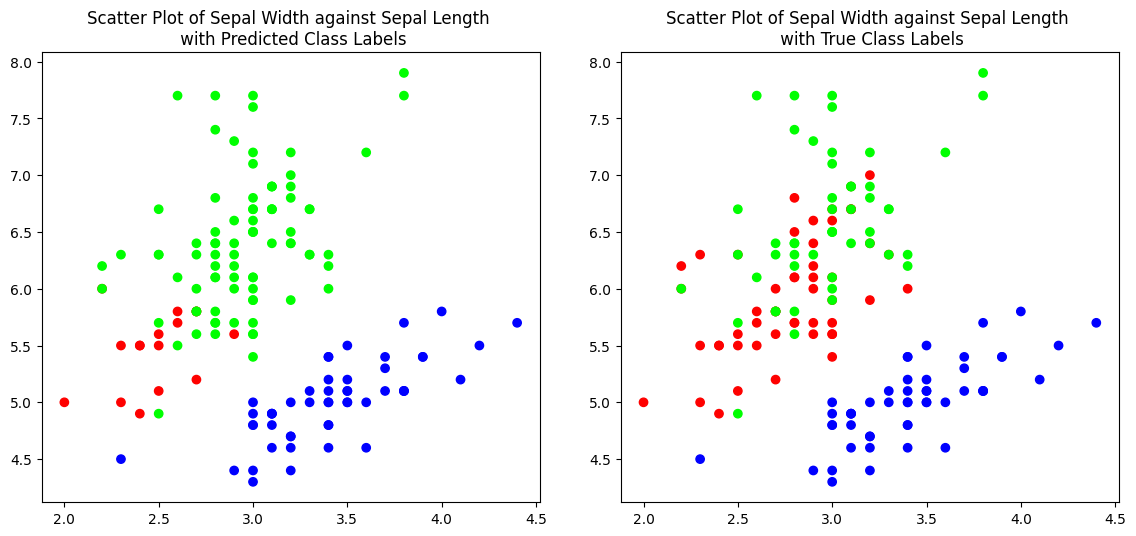

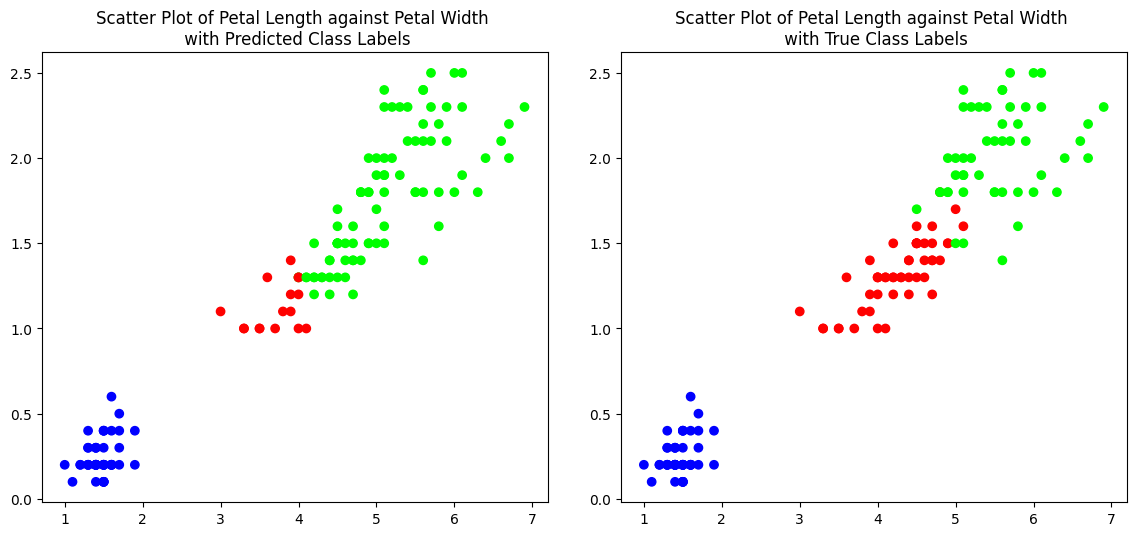

In [32]:
comparision_graph(target_average, "Sepal Width", "Sepal Length")
comparision_graph(target_average, "Petal Length", "Petal Width")

**Complete Linkage:** Calculates all pairwise measure for observations in clusters and returns the largest of those values.

In [33]:
d_complete, target_complete = Heirarchical(features_data.values, 147, 2)

In [34]:
d_complete

{0: (39, 7),
 1: (132, 128),
 2: (17, 0),
 3: (48, 10),
 4: (91, 63),
 5: (92, 82),
 6: (96, 95),
 7: (4, 0),
 8: (28, 0),
 9: (40, 17),
 10: (47, 3),
 11: (81, 80),
 12: (137, 116),
 13: (12, 1),
 14: (21, 19),
 15: (38, 8),
 16: (46, 19),
 17: (49, 7),
 18: (27, 0),
 19: (30, 29),
 20: (45, 1),
 21: (75, 65),
 22: (93, 57),
 23: (99, 96),
 24: (138, 127),
 25: (9, 1),
 26: (34, 1),
 27: (37, 1),
 28: (126, 123),
 29: (139, 112),
 30: (95, 88),
 31: (26, 23),
 32: (42, 38),
 33: (89, 53),
 34: (25, 9),
 35: (97, 74),
 36: (84, 66),
 37: (143, 120),
 38: (73, 63),
 39: (11, 7),
 40: (43, 26),
 41: (147, 110),
 42: (29, 3),
 43: (58, 54),
 44: (78, 63),
 45: (116, 103),
 46: (145, 141),
 47: (146, 123),
 48: (148, 136),
 49: (144, 140),
 50: (94, 90),
 51: (87, 68),
 52: (122, 105),
 53: (6, 2),
 54: (52, 50),
 55: (56, 51),
 56: (80, 69),
 57: (113, 101),
 58: (130, 107),
 59: (142, 113),
 60: (127, 126),
 61: (149, 127),
 62: (31, 20),
 63: (82, 67),
 64: (86, 52),
 65: (124, 120),
 6

In [35]:
target_complete

array([141., 141., 141., 141., 141., 141., 141., 141., 141., 141., 141.,
       141., 141., 141., 141., 141., 141., 141., 141., 141., 141., 141.,
       141., 141., 141., 141., 141., 141., 141., 141., 141., 141., 141.,
       141., 141., 141., 141., 141., 141., 141., 141., 141., 141., 141.,
       141., 141., 141., 141., 141., 141., 146., 146., 146., 143., 146.,
       143., 146., 143., 146., 143., 143., 143., 143., 143., 143., 146.,
       143., 143., 146., 143., 146., 143., 143., 143., 143., 146., 146.,
       146., 143., 143., 143., 143., 143., 143., 143., 146., 146., 146.,
       143., 143., 143., 143., 143., 143., 143., 143., 143., 143., 143.,
       143., 146., 146., 146., 146., 146., 146., 143., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 143., 146.,
       146., 146., 143., 146., 146., 143., 143., 146., 146., 146., 146.,
       146., 143., 146., 146., 146., 146., 143., 146., 146., 146., 146.,
       146., 146., 146., 143., 146., 146., 143.])

In [36]:
target_complete[target_complete == 141] = 0
target_complete[target_complete == 143] = 1
target_complete[target_complete == 146] = 2

**Comparing Complete Linking Hierarchical Clustering with True Class Labels**

In [37]:
compare(target_complete, "Complete")

Number of data points in each cluster:

True Class Label
Iris-setosa: 50
Iris-versicolor: 50
Iris-virginica: 50

In our Complete Linkage Hierarchical Clustering there are: 

Iris-setosa: 50
Iris-versicolor: 44
Iris-virginica: 56


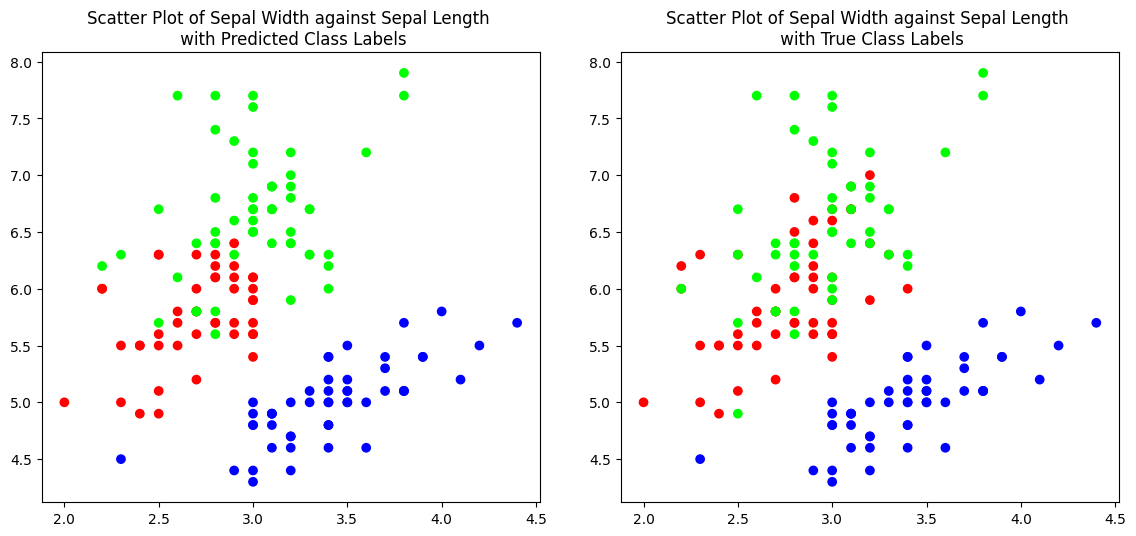

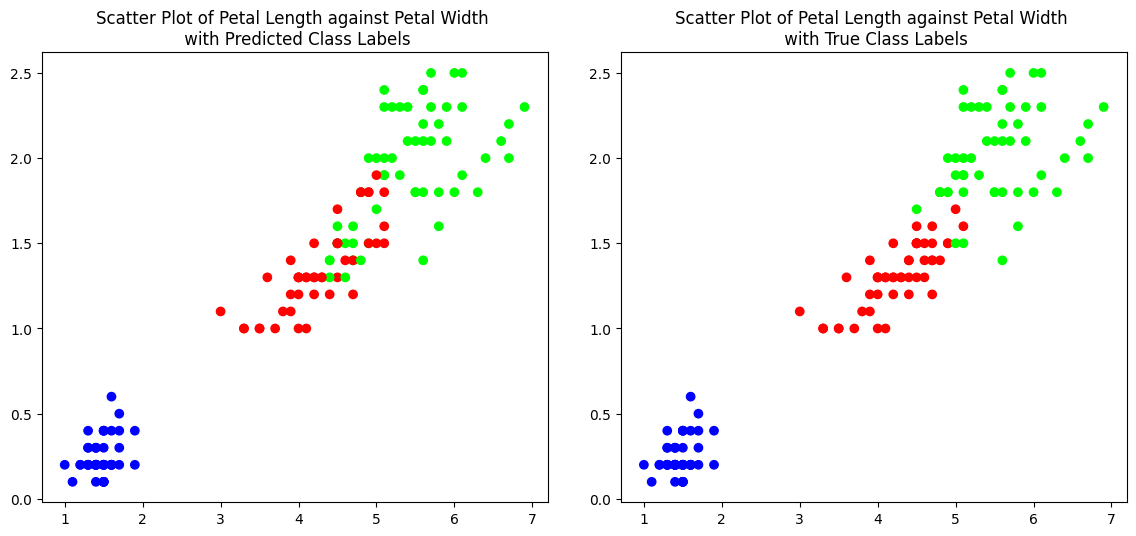

In [38]:
comparision_graph(target_complete, "Sepal Width", "Sepal Length")
comparision_graph(target_complete, "Petal Length", "Petal Width")

# **Performance Evaluation in terms of percentages!**

In [39]:
100 - (target_labels != target_average).sum()/float(target_labels.size)*100

77.33333333333334

In [40]:
100 - (target_labels != target).sum()/float(target_labels.size)*100

80.0

In [41]:
100 - (target_labels != target_complete).sum()/float(target_labels.size)*100

84.0